In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 image

In [2]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [3]:
#constant
BATCH_SIZE = 200
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

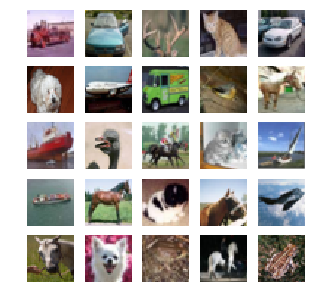

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 
from scipy.misc import toimage

# first time aroudn use the line below to get the data
# cifar10.load_data()

f = open('C:/users/Samar/.keras/datasets/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f, encoding='latin1')
f.close()
X = datadict["data"] 
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)
fig, axes1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(toimage(X[i:i+1][0]))

plt.show()

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
np.random.seed(100)
rand_indices_10000 = np.random.choice(range(50000), 10000,replace=False)
rand_indices_3000 =  np.random.choice(range(10000),3000,replace=False)
X_train = X_train[rand_indices_10000]
X_test = X_test[rand_indices_3000]
y_train = y_train[rand_indices_10000]
y_test = y_test[rand_indices_3000]

In [7]:
print(rand_indices_10000[:10])

[ 4253 30076 48047  1666 30740 13830 34366  5893 45012 20187]


In [8]:
# Turn our labels into a OHE representation
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(Y_train[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


In [9]:
# Cast train, test sets to float32 and normalize by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
model = Sequential()
# Add 32 convolutional filters of size 3 x 3 
# so number of parameters will be (3 * 3*3 + 1) * 32 = 896
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
# max pooling will give us a shape of 16,16,32
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
__________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
        metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
        epochs=100, validation_split=VALIDATION_SPLIT,
        verbose=VERBOSE)

print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 79s 10ms/step - loss: 2.4463 - acc: 0.2289 - val_loss: 1.9499 - val_acc: 0.2950
Epoch 2/100
8000/8000 [==============================] - 78s 10ms/step - loss: 1.7411 - acc: 0.3932 - val_loss: 1.7413 - val_acc: 0.3525
Epoch 3/100
8000/8000 [==============================] - 73s 9ms/step - loss: 1.5055 - acc: 0.4750 - val_loss: 1.8801 - val_acc: 0.3625
Epoch 4/100
8000/8000 [==============================] - 70s 9ms/step - loss: 1.3248 - acc: 0.5370 - val_loss: 1.4471 - val_acc: 0.4795
Epoch 5/100
8000/8000 [==============================] - 66s 8ms/step - loss: 1.1399 - acc: 0.6006 - val_loss: 1.3382 - val_acc: 0.5225
Epoch 6/100
8000/8000 [==============================] - 66s 8ms/step - loss: 1.0035 - acc: 0.6515 - val_loss: 1.3314 - val_acc: 0.5245
Epoch 7/100
8000/8000 [==============================] - 66s 8ms/step - loss: 0.8680 - acc: 0.7029 - val_loss: 1.3080 - val_acc: 0.546

8000/8000 [==============================] - 72s 9ms/step - loss: 0.0015 - acc: 0.9996 - val_loss: 3.1604 - val_acc: 0.5755
Epoch 61/100
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0378 - acc: 0.9927 - val_loss: 3.1133 - val_acc: 0.5695
Epoch 62/100
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0051 - acc: 0.9980 - val_loss: 3.3483 - val_acc: 0.5540
Epoch 63/100
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0315 - acc: 0.9926 - val_loss: 3.1203 - val_acc: 0.5630
Epoch 64/100
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0021 - acc: 0.9996 - val_loss: 3.1590 - val_acc: 0.5735
Epoch 65/100
8000/8000 [==============================] - 72s 9ms/step - loss: 0.0058 - acc: 0.9980 - val_loss: 3.4186 - val_acc: 0.5635
Epoch 66/100
8000/8000 [==============================] - 72s 9ms/step - loss: 0.0050 - acc: 0.9988 - val_loss: 4.9523 - val_acc: 0.4610
Epoch 67/100
8000/8000 [==============================

In [13]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


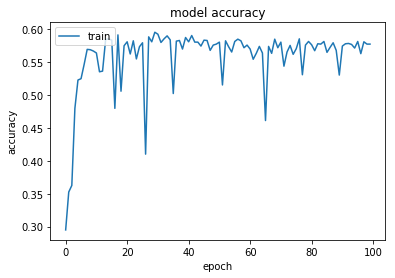

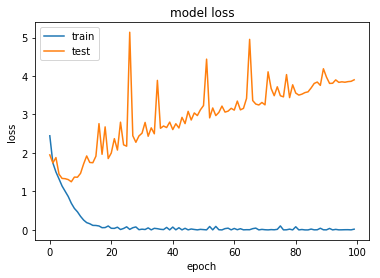

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
        metrics=['accuracy'])

In [18]:
X_train.shape

(10000, 32, 32, 3)

In [21]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
        epochs=100, validation_split=VALIDATION_SPLIT,
        verbose=VERBOSE)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 61s 8ms/step - loss: 2.2187 - acc: 0.1935 - val_loss: 2.1325 - val_acc: 0.1905
Epoch 2/100
8000/8000 [==============================] - 61s 8ms/step - loss: 1.9859 - acc: 0.2808 - val_loss: 2.1946 - val_acc: 0.2175
Epoch 3/100
8000/8000 [==============================] - 61s 8ms/step - loss: 1.8444 - acc: 0.3386 - val_loss: 1.9988 - val_acc: 0.2680
Epoch 4/100
8000/8000 [==============================] - 61s 8ms/step - loss: 1.6951 - acc: 0.3857 - val_loss: 1.5714 - val_acc: 0.4330
Epoch 5/100
8000/8000 [==============================] - 62s 8ms/step - loss: 1.6204 - acc: 0.4140 - val_loss: 1.6365 - val_acc: 0.4100
Epoch 6/100
8000/8000 [==============================] - 61s 8ms/step - loss: 1.5135 - acc: 0.4580 - val_loss: 1.6666 - val_acc: 0.3860
Epoch 7/100
8000/8000 [==============================] - 61s 8ms/step - loss: 1.4334 - acc: 0.4859 - val_loss: 1.3665 - val_acc: 0.5050


8000/8000 [==============================] - 68s 9ms/step - loss: 0.1063 - acc: 0.9623 - val_loss: 1.6772 - val_acc: 0.6410
Epoch 61/100
8000/8000 [==============================] - 68s 9ms/step - loss: 0.1132 - acc: 0.9607 - val_loss: 1.9108 - val_acc: 0.6545
Epoch 62/100
8000/8000 [==============================] - 68s 9ms/step - loss: 0.1196 - acc: 0.9569 - val_loss: 1.7267 - val_acc: 0.6565
Epoch 63/100
8000/8000 [==============================] - 68s 9ms/step - loss: 0.1041 - acc: 0.9664 - val_loss: 1.6945 - val_acc: 0.6510
Epoch 64/100
8000/8000 [==============================] - 68s 9ms/step - loss: 0.1062 - acc: 0.9664 - val_loss: 1.5495 - val_acc: 0.6395
Epoch 65/100
8000/8000 [==============================] - 71s 9ms/step - loss: 0.1057 - acc: 0.9657 - val_loss: 1.8087 - val_acc: 0.6485
Epoch 66/100
8000/8000 [==============================] - 69s 9ms/step - loss: 0.1127 - acc: 0.9629 - val_loss: 1.8531 - val_acc: 0.6540
Epoch 67/100
8000/8000 [==============================

In [22]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
3000/3000 [==============================] - 8s 3ms/step

Test score: 2.13537073135
Test accuracy: 0.6603333354


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


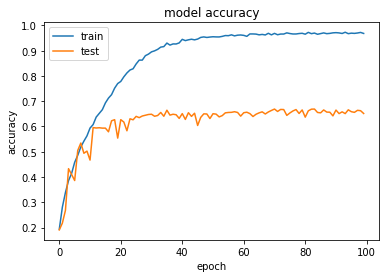

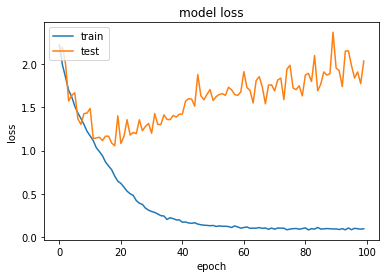

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()